<h1> PCA </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load the dataset
file_path = "Final_2_cleaned.csv"
df = pd.read_csv(file_path)
df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [4]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df.head(5)


,Rank,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),Market Cap(Billion $),PE Ratio,Current Price,52 Week High,52 Week Low,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,50.0,252.9,4090.7,588.1,747.80,13.53,267.30,270.82,172.62,74.63,3.0,1.09,317233,1980
1,2.0,73.4,369.0,1070.0,899.1,1010.43,9.48,468.67,491.67,389.29,0.00,3.0,0.86,392400,1996
2,3.0,116.9,489.1,661.5,1919.3,6698.99,16.36,27.65,32.65,26.80,996.71,3.0,0.17,67947,2019
3,4.0,50.4,223.8,6586.0,215.2,2449.09,5.03,5.28,5.36,3.75,12.18,3.0,0.97,72000,1980
4,5.0,25.0,183.3,3273.8,307.3,352.38,14.42,46.30,48.08,32.35,29.25,1.0,1.33,213000,1973


In [5]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
print(scaled_data)

[[-0.73446546  0.41131738  1.38782957 ...  0.33190277  0.96346134
  -0.33085956]
 [-0.72940627  0.6791208   2.47606546 ... -0.2826799   1.32435086
   0.58518148]
 [-0.72434708  1.1769605   3.60179441 ... -2.12642791 -0.23340305
   1.90199046]
 ...
 [-0.72978571 -0.15209981 -0.9123693  ...  2.92383837 -0.54522462
   1.55847507]
 [-0.73025622 -0.15816545 -0.91518128 ... -1.4049613  -0.52409947
  -0.15910186]
 [-0.7342125  -0.15187092 -0.91143197 ...  0.14485587 -0.51161643
   1.55847507]]


<h3>PCA 2 Component</h3>

In [6]:
# PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data)
explained_variance_2 = sum(pca_2.explained_variance_ratio_) * 100


In [7]:

# PCA Components and Feature Names
component_names = [f"PC{i+1}" for i in range(pca_2.n_components_)]
feature_names = list(numeric_df.columns)

# Construct a DataFrame for the PCA loadings
loadings_2 = pd.DataFrame(
    pca_2.components_.T,  # Transpose to align feature names with components
    columns=component_names,
    index=feature_names,
)

print("\nPCA Loadings:")
print(loadings_2)



PCA Loadings:
                               PC1       PC2
Rank                     -0.043417 -0.396671
Profit (Billion $)        0.003284  0.058637
Revenue (Billion $)       0.060868  0.593210
Assets (Billion $)       -0.007109  0.161620
Market Value (Billion $)  0.039751  0.421583
Market Cap(Billion $)     0.498056 -0.030621
PE Ratio                 -0.009225 -0.022809
Current Price             0.497889 -0.040935
52 Week High              0.498052 -0.042436
52 Week Low               0.497666 -0.042302
EBITDA                   -0.006669  0.066911
Rating                    0.022939  0.151970
Beta                     -0.006145 -0.186968
No of Employees           0.008635  0.462533
Founding Year            -0.017885 -0.016493


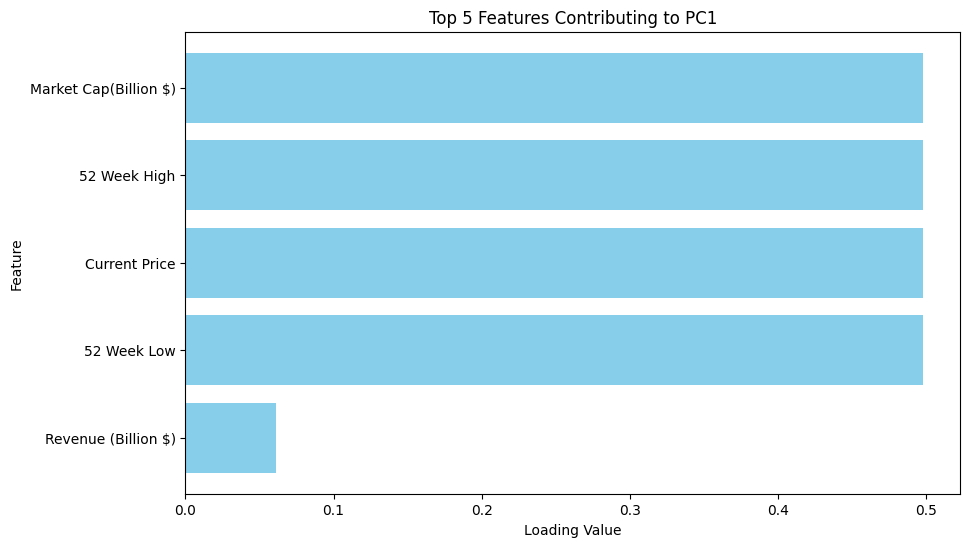

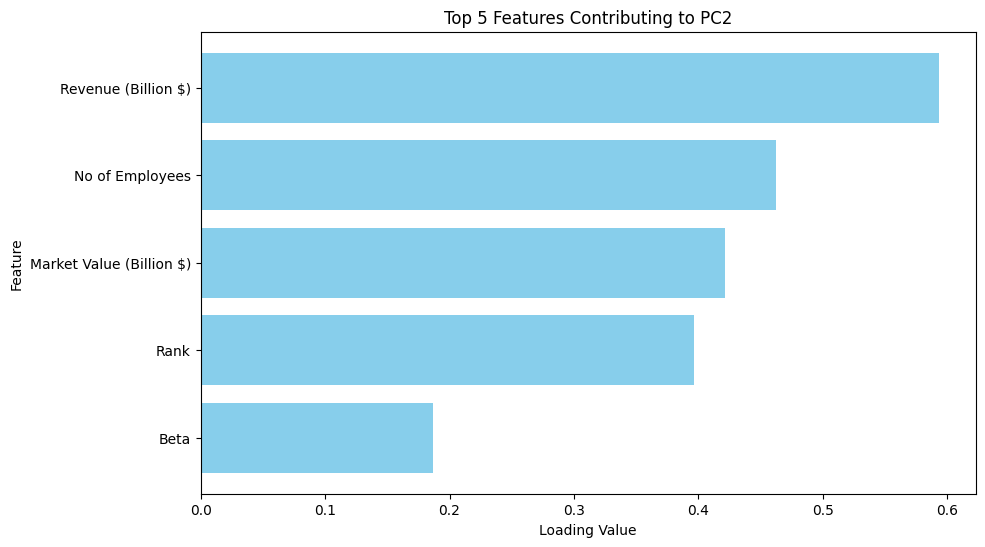

In [8]:
# Function to visualize the loadings for a particular principal component
def visualize_loadings(loadings_df, component, top_n=5):
    # Sort loadings by magnitude (absolute value)
    component_loadings = loadings_df[component].abs().sort_values(ascending=False)
    # Get the top N features
    top_features = component_loadings.head(top_n)

    # Prepare data for the plot
    features = top_features.index.tolist()
    values = top_features.values

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(features, values, color='skyblue')
    plt.xlabel('Loading Value')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Features Contributing to {component}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Show the plots
visualize_loadings(loadings_2, "PC1")
visualize_loadings(loadings_2, "PC2")

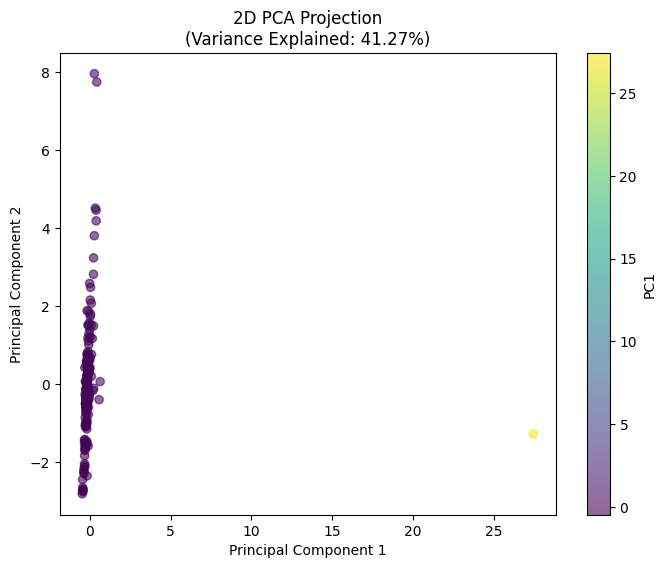

In [9]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], c=pca_2_result[:, 0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="PC1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"2D PCA Projection\n(Variance Explained: {explained_variance_2:.2f}%)")
plt.show()

<H3>PCA 3 Components </H3>

In [10]:
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(scaled_data)
explained_variance_3 = sum(pca_3.explained_variance_ratio_) * 100

In [11]:
# PCA Components and Feature Names
component_names = [f"PC{i+1}" for i in range(pca_3.n_components_)]
feature_names = list(numeric_df.columns)

# Construct a DataFrame for the PCA loadings
loadings_3 = pd.DataFrame(
    pca_3.components_.T,  # Transpose to align feature names with components
    columns=component_names,
    index=feature_names,
)

print("\nPCA Loadings:")
print(loadings_3)


PCA Loadings:
                               PC1       PC2       PC3
Rank                     -0.043417 -0.396671  0.360751
Profit (Billion $)        0.003284  0.058637  0.284290
Revenue (Billion $)       0.060868  0.593210  0.027190
Assets (Billion $)       -0.007109  0.161620 -0.361010
Market Value (Billion $)  0.039751  0.421583  0.388257
Market Cap(Billion $)     0.498056 -0.030621  0.001501
PE Ratio                 -0.009225 -0.022809  0.549541
Current Price             0.497889 -0.040935  0.007083
52 Week High              0.498052 -0.042436  0.002533
52 Week Low               0.497666 -0.042302  0.001400
EBITDA                   -0.006669  0.066911 -0.063160
Rating                    0.022939  0.151970 -0.010227
Beta                     -0.006145 -0.186968  0.235758
No of Employees           0.008635  0.462533  0.159077
Founding Year            -0.017885 -0.016493  0.346683


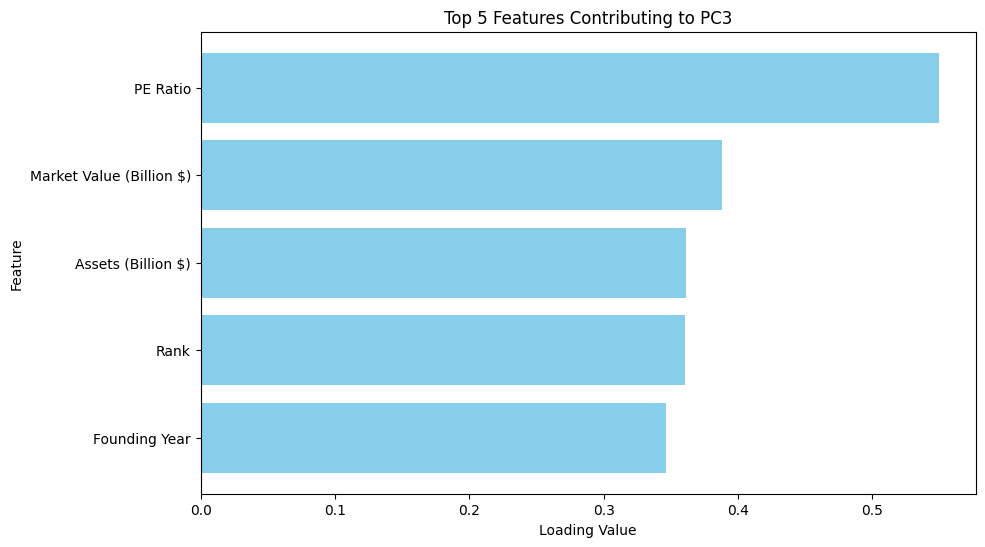

In [12]:
# Function to visualize the loadings for a particular principal component
def visualize_loadings(loadings_df, component, top_n=5):
    # Sort loadings by magnitude (absolute value)
    component_loadings = loadings_df[component].abs().sort_values(ascending=False)
    # Get the top N features
    top_features = component_loadings.head(top_n)

    # Prepare data for the plot
    features = top_features.index.tolist()
    values = top_features.values

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(features, values, color='skyblue')
    plt.xlabel('Loading Value')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Features Contributing to {component}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Show the plots
visualize_loadings(loadings_3, "PC3")


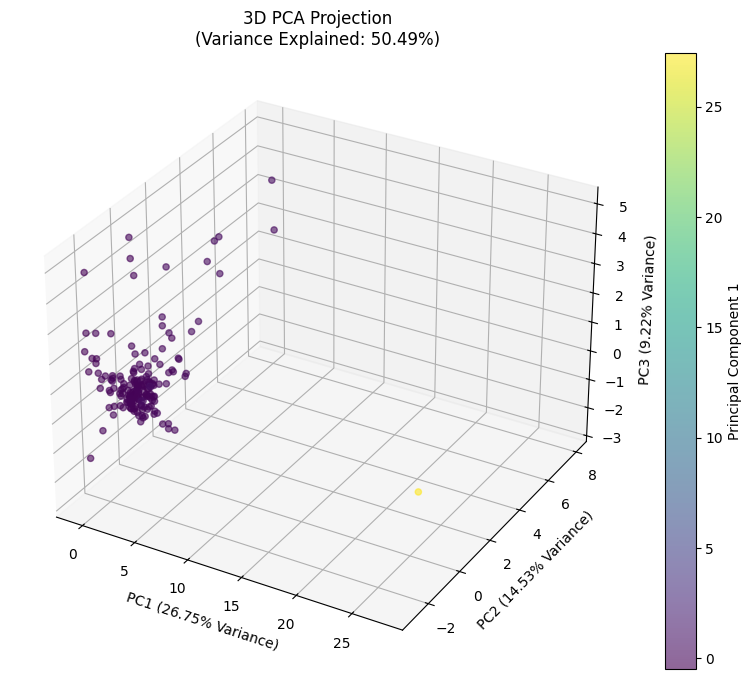

In [13]:
explained_variance_ratios = pca_3.explained_variance_ratio_

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA-transformed data
sc = ax.scatter(
    pca_3_result[:, 0], 
    pca_3_result[:, 1], 
    pca_3_result[:, 2], 
    c=pca_3_result[:, 0], 
    cmap='viridis', 
    alpha=0.6
)

# Add colorbar for better visualization
plt.colorbar(sc, label="Principal Component 1")

# Set axis labels
ax.set_xlabel(f"PC1 ({explained_variance_ratios[0] * 100:.2f}% Variance)")
ax.set_ylabel(f"PC2 ({explained_variance_ratios[1] * 100:.2f}% Variance)")
ax.set_zlabel(f"PC3 ({explained_variance_ratios[2] * 100:.2f}% Variance)")

# Add title with total variance explained
ax.set_title(f"3D PCA Projection\n(Variance Explained: {explained_variance_3:.2f}%)")

# Show the plot
plt.show()

In [14]:
# Determining components required for 95% variance
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
eigenvalues = pca_full.explained_variance_[:3]

In [15]:
print(f"Variance retained with 2 components: {explained_variance_2:.2f}%")
print(f"Variance retained with 3 components: {explained_variance_3:.2f}%")
print(f"Number of components required for 95% variance: {num_components_95}")
print(f"Top three eigenvalues: {eigenvalues}")

Variance retained with 2 components: 41.27%
Variance retained with 3 components: 50.49%
Number of components required for 95% variance: 11
Top three eigenvalues: [4.03354335 2.19034153 1.38995668]


<h3> Problem statement:  Performing dimensionality reduction to identify the major factors influencing risk and market volatility</h3>

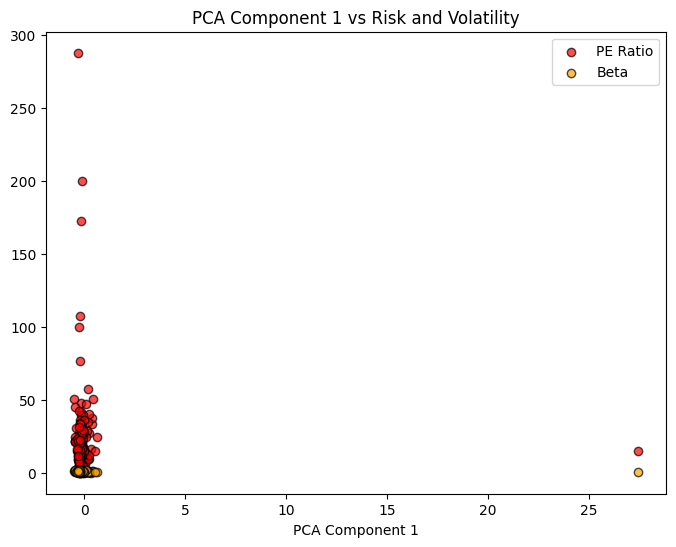

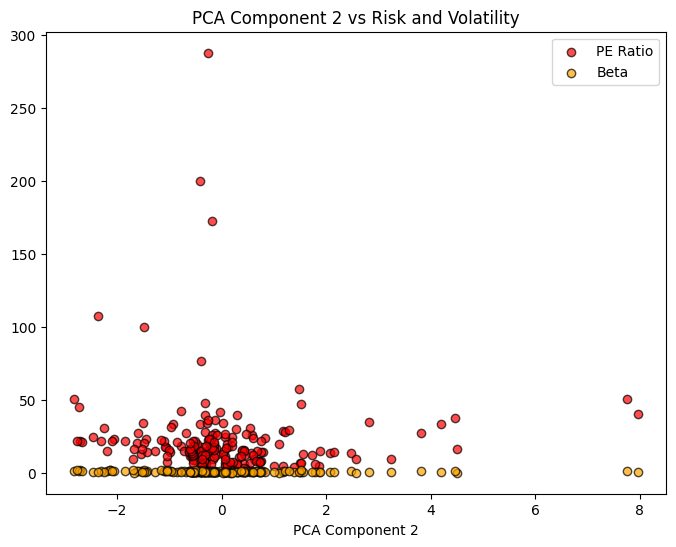

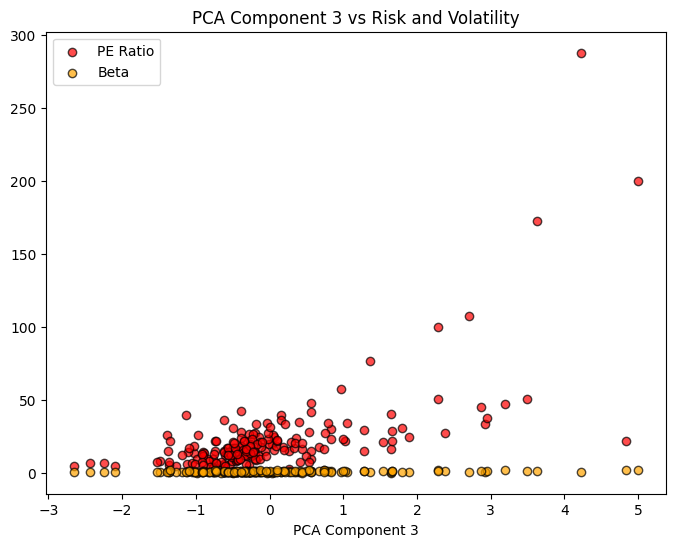

In [16]:
# Example: Risk and Volatility Analysis (PCA Component 1 vs PE Ratio and Beta)

df['PCA Component 1'] = pca_3_result[:, 0]
df['PCA Component 2'] = pca_3_result[:, 1]
df['PCA Component 3'] = pca_3_result[:, 2]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 1'], df['PE Ratio'], c='red', edgecolor='k', alpha=0.7, label="PE Ratio")
plt.scatter(df['PCA Component 1'], df['Beta'], c='orange', edgecolor='k', alpha=0.7, label="Beta")
plt.title("PCA Component 1 vs Risk and Volatility")
plt.xlabel("PCA Component 1")
plt.legend()
plt.show()


# Example: Risk and Volatility Analysis (PCA Component 1 vs PE Ratio and Beta)
plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 2'], df['PE Ratio'], c='red', edgecolor='k', alpha=0.7, label="PE Ratio")
plt.scatter(df['PCA Component 2'], df['Beta'], c='orange', edgecolor='k', alpha=0.7, label="Beta")
plt.title("PCA Component 2 vs Risk and Volatility")
plt.xlabel("PCA Component 2")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 3'], df['PE Ratio'], c='red', edgecolor='k', alpha=0.7, label="PE Ratio")
plt.scatter(df['PCA Component 3'], df['Beta'], c='orange', edgecolor='k', alpha=0.7, label="Beta")
plt.title("PCA Component 3 vs Risk and Volatility")
plt.xlabel("PCA Component 3")
plt.legend()
plt.show()

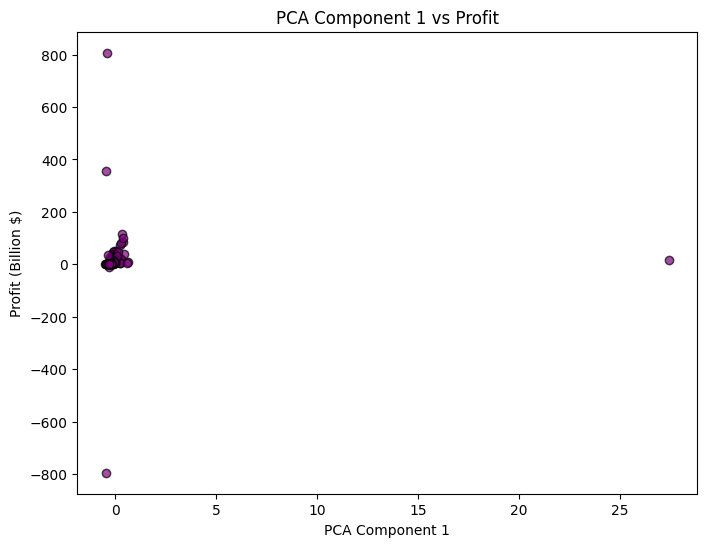

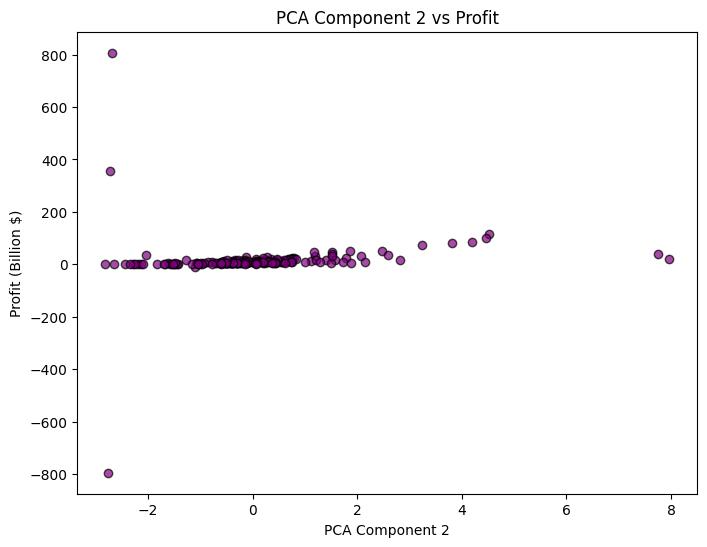

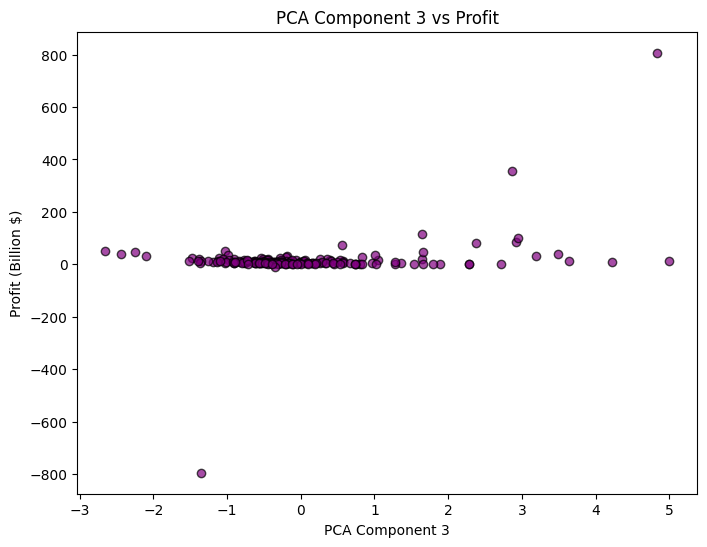

In [17]:
# Example: Profit vs Size using PCA
plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 1'], df['Profit (Billion $)'], c='purple', edgecolor='k', alpha=0.7)
plt.title("PCA Component 1 vs Profit")
plt.xlabel("PCA Component 1")
plt.ylabel("Profit (Billion $)")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 2'], df['Profit (Billion $)'], c='purple', edgecolor='k', alpha=0.7)
plt.title("PCA Component 2 vs Profit")
plt.xlabel("PCA Component 2")
plt.ylabel("Profit (Billion $)")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['PCA Component 3'], df['Profit (Billion $)'], c='purple', edgecolor='k', alpha=0.7)
plt.title("PCA Component 3 vs Profit")
plt.xlabel("PCA Component 3")
plt.ylabel("Profit (Billion $)")
plt.show()

<h1> Clustering </h1>

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
# Perform PCA
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(pca_3_result), columns=['PC1', 'PC2', 'PC3'])

print("Variance explained:", pca.explained_variance_ratio_.sum())

# Display before and after
print("Original data:")
print(df.head())


Variance explained: 1.0
Original data:
   Rank   Ticker                              Company Name  \
0   1.0      JPM                             JPMorganChase   
1   2.0    BRK-B                        Berkshire Hathaway   
2   3.0  2222.SR  Saudi Arabian Oil Company (Saudi Aramco)   
3   4.0  1398.HK                                      ICBC   
4   5.0      BAC                           Bank of America   

                  Industry              Sector        Country  \
0      Banks - Diversified  Financial Services  United States   
1  Insurance - Diversified  Financial Services  United States   
2     Oil & Gas Integrated              Energy   Saudi Arabia   
3      Banks - Diversified  Financial Services          China   
4      Banks - Diversified  Financial Services  United States   

   Profit (Billion $)  Revenue (Billion $)  Assets (Billion $)  \
0                50.0                252.9              4090.7   
1                73.4                369.0              1070.0   

In [20]:
print("\nNormalized and PCA-reduced data:")
print(df_pca.head())


Normalized and PCA-reduced data:
        PC1       PC2       PC3
0  0.035330  2.481140 -1.031404
1  0.223036  3.236719  0.557529
2  0.327747  4.511011  1.649454
3 -0.083190  1.859225 -2.648878
4 -0.184296  0.783267 -1.106178


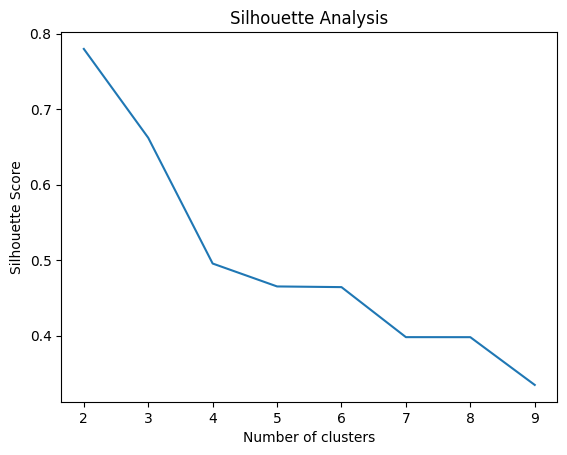

[(np.float64(0.7798049804465994), 2), (np.float64(0.6620534667153996), 3), (np.float64(0.49549156065729666), 4)]


In [21]:
# # Silhouette analysis
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plot silhouette scores
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Choose 3 best k values
best_k = sorted(zip(silhouette_scores, K), reverse=True)[:3]
print(best_k)

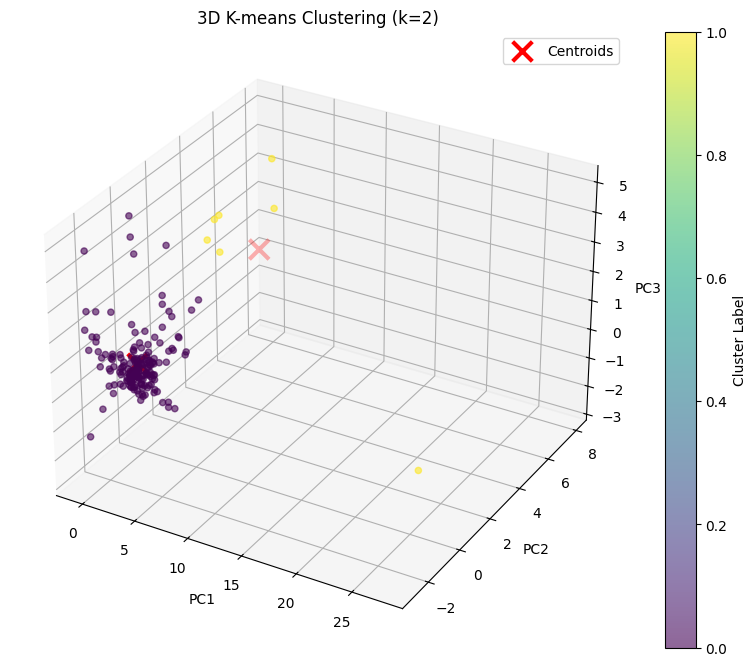

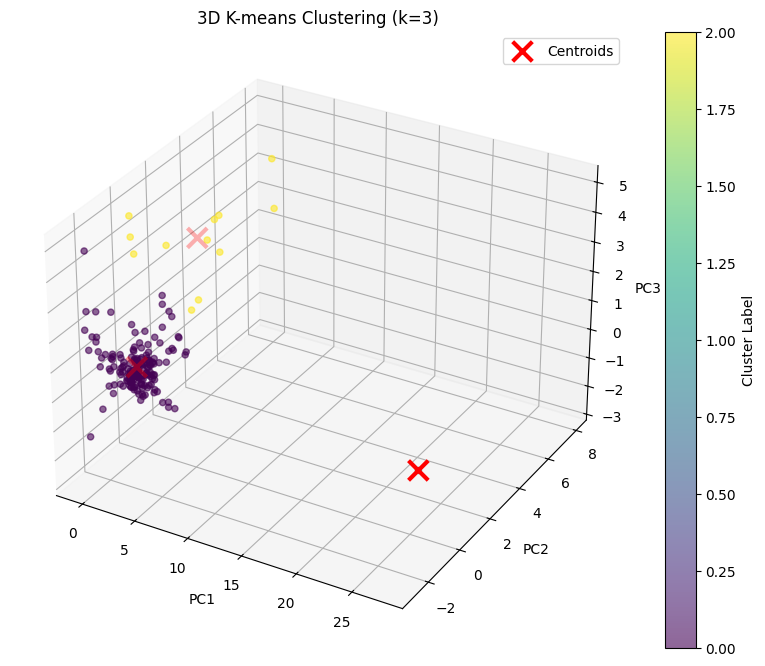

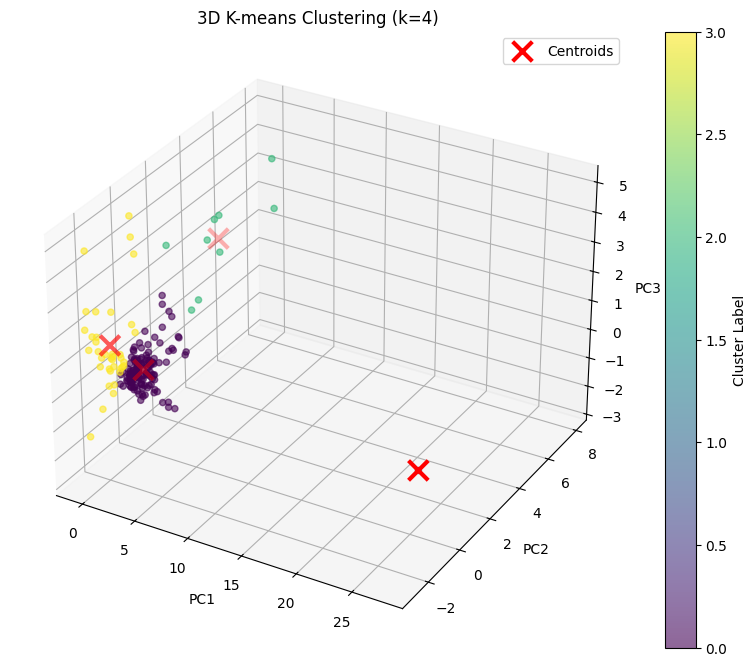

In [22]:
# # Perform k-means for best k values
for score, k in best_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_3_result)
 # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of PCA-transformed data with cluster labels
    scatter = ax.scatter(
        pca_3_result[:, 0], 
        pca_3_result[:, 1], 
        pca_3_result[:, 2], 
        c=cluster_labels, 
        cmap='viridis', 
        alpha=0.6
    )
    
    # Plot cluster centroids
    centroids = kmeans.cluster_centers_
    ax.scatter(
        centroids[:, 0], 
        centroids[:, 1], 
        centroids[:, 2], 
        c='red', 
        marker='x', 
        s=200, 
        linewidths=3, 
        label='Centroids'
    )
    
    # Add axis labels and title
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'3D K-means Clustering (k={k})')
    
    # Add legend and colorbar
    ax.legend()
    plt.colorbar(scatter, label="Cluster Label")
    
    # Show the plot
    plt.show()

<h3>Hierarcical Clustering </h3>

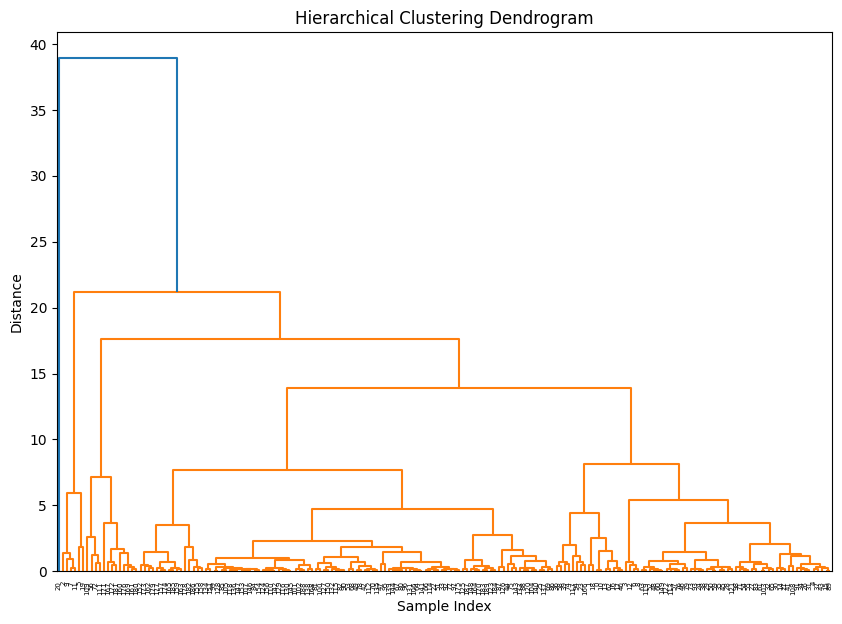

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(pca_3_result, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

<H3>DBSCAN</H3>

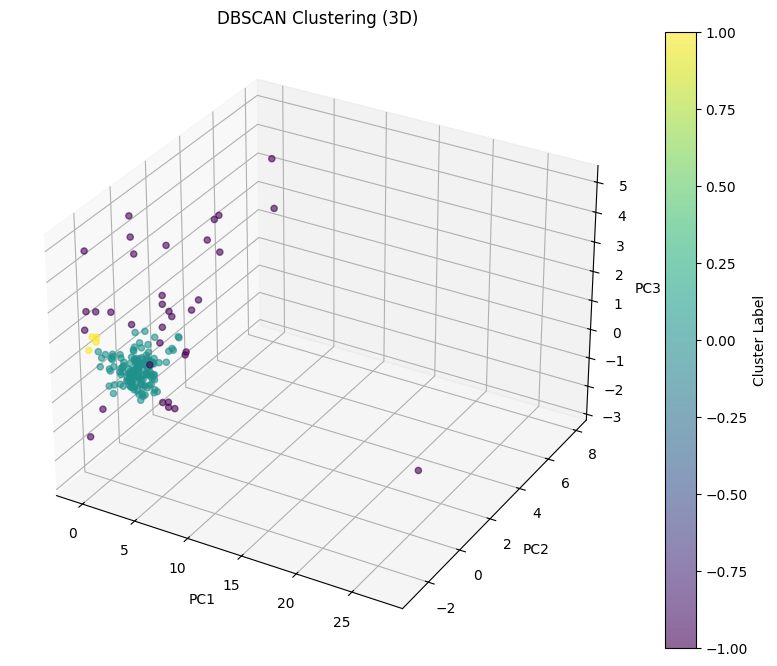

In [24]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(df_pca)
dbscan_labels = dbscan.fit_predict(df_pca[['PC1', 'PC2', 'PC3']].values)

# # Plot DBSCAN results
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=dbscan_labels, cmap='viridis')
# plt.title('DBSCAN Clustering')
# plt.colorbar(scatter)
# plt.show()

# Create a 3D scatter plot for DBSCAN results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with PCA components and color by DBSCAN labels
scatter = ax.scatter(
    df_pca['PC1'], 
    df_pca['PC2'], 
    df_pca['PC3'], 
    c=dbscan_labels, 
    cmap='viridis',
    alpha=0.6
)

# Set axis labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering (3D)')

# Add a color bar to show cluster labels
plt.colorbar(scatter, label="Cluster Label")
plt.show()

<h1>ARM</h1>

<h3>Problem Statement: Develop an Association Rule Mining (ARM) solution that leverages a cleaned financial dataset of Fortune 500 companies to uncover significant association rules between important financial metrics. The goal is to determine whether specific patterns exist—such as companies with high revenue also displaying high assets and market capitalization, or relationships between profitability metrics and valuation ratios</h3>

In [25]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [26]:

selected_features = [
    'Profit (Billion $)', 'Revenue (Billion $)', 'Assets (Billion $)',
    'Market Cap(Billion $)', 'PE Ratio', 'EBITDA'
]

# Create a copy for ARM processing.
df_arm = df[selected_features].copy()

# Discretize these features into bins (using duplicates='drop' if needed for stability).
for col in df_arm.columns:
    try:
        # Use 3 quantile-based bins labeled as "Low", "Medium", "High"
        df_arm[col + '_cat'] = pd.qcut(df_arm[col], q=3, labels=["Low", "Medium", "High"], duplicates='drop')
    except Exception as e:
        print(f"Warning: Could not discretize column {col}: {e}")

# Select only the new categorical columns.
cat_cols = [col for col in df_arm.columns if col.endswith('_cat')]
df_arm_subset = df_arm[cat_cols]

In [27]:
# Display a sample of the prepared ARM data (unlabeled transactions)
print("Sample of prepared ARM data (categorical transactions):")
print(df_arm_subset.head())

Sample of prepared ARM data (categorical transactions):
  Profit (Billion $)_cat Revenue (Billion $)_cat Assets (Billion $)_cat  \
0                   High                    High                   High   
1                   High                    High                   High   
2                   High                    High                   High   
3                   High                    High                   High   
4                   High                    High                   High   

  Market Cap(Billion $)_cat PE Ratio_cat EBITDA_cat  
0                      High       Medium       High  
1                      High          Low        Low  
2                      High       Medium       High  
3                      High          Low     Medium  
4                      High       Medium       High  


In [28]:

df_arm_encoded = pd.get_dummies(df_arm_subset, prefix_sep='=')
print(f"One–hot encoded data shape: {df_arm_encoded.shape}")

frequent_itemsets = apriori(df_arm_encoded, min_support=0.1, use_colnames=True)
print(f"Number of frequent itemsets found: {frequent_itemsets.shape[0]}")


One–hot encoded data shape: (190, 18)
Number of frequent itemsets found: 127


In [29]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(f"Total number of rules generated: {len(rules)}")

Total number of rules generated: 158


In [30]:
# Top 15 rules sorted by support
top_support = rules.sort_values(by='support', ascending=False).head(15)
print("\nTop 15 Rules by Support:")
print(top_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Top 15 Rules by Support:
                         antecedents                       consequents  \
0       (Profit (Billion $)_cat=Low)     (Revenue (Billion $)_cat=Low)   
8   (Market Cap(Billion $)_cat=High)     (Profit (Billion $)_cat=High)   
9      (Profit (Billion $)_cat=High)  (Market Cap(Billion $)_cat=High)   
1      (Revenue (Billion $)_cat=Low)      (Profit (Billion $)_cat=Low)   
12                  (EBITDA_cat=Low)     (Revenue (Billion $)_cat=Low)   
4       (Profit (Billion $)_cat=Low)                  (EBITDA_cat=Low)   
5                   (EBITDA_cat=Low)      (Profit (Billion $)_cat=Low)   
13     (Revenue (Billion $)_cat=Low)                  (EBITDA_cat=Low)   
6     (Revenue (Billion $)_cat=High)     (Profit (Billion $)_cat=High)   
7      (Profit (Billion $)_cat=High)    (Revenue (Billion $)_cat=High)   
17   (Market Cap(Billion $)_cat=Low)                  (EBITDA_cat=Low)   
16                  (EBITDA_cat=Low)   (Market Cap(Billion $)_cat=Low)   
11      (Ass

In [31]:
# Top 15 rules sorted by confidence
top_confidence = rules.sort_values(by='confidence', ascending=False).head(15)
print("\nTop 15 Rules by Confidence:")
print(top_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 15 Rules by Confidence:
                                           antecedents  \
96   (Profit (Billion $)_cat=Low, Revenue (Billion ...   
94   (Profit (Billion $)_cat=Low, EBITDA_cat=Low, A...   
125  (Revenue (Billion $)_cat=Low, Market Cap(Billi...   
143  (Profit (Billion $)_cat=Low, Revenue (Billion ...   
139  (Profit (Billion $)_cat=Low, EBITDA_cat=Low, M...   
81                (EBITDA_cat=High, PE Ratio_cat=High)   
134  (PE Ratio_cat=High, EBITDA_cat=Low, Assets (Bi...   
19   (Profit (Billion $)_cat=Low, Assets (Billion $...   
33   (Profit (Billion $)_cat=Low, Assets (Billion $...   
106  (Profit (Billion $)_cat=Low, Revenue (Billion ...   
124  (EBITDA_cat=Low, Market Cap(Billion $)_cat=Low...   
86   (Profit (Billion $)_cat=Low, Market Cap(Billio...   
115  (Profit (Billion $)_cat=Low, Market Cap(Billio...   
133  (PE Ratio_cat=High, Revenue (Billion $)_cat=Lo...   
101  (Profit (Billion $)_cat=Low, Assets (Billion $...   

                                       con

In [32]:
# Top 15 rules sorted by lift
top_lift = rules.sort_values(by='lift', ascending=False).head(15)
print("\nTop 15 Rules by Lift:")
print(top_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 15 Rules by Lift:
                                           antecedents  \
157  (Profit (Billion $)_cat=Low, Assets (Billion $...   
146  (Revenue (Billion $)_cat=Low, EBITDA_cat=Low, ...   
156  (Revenue (Billion $)_cat=Low, Market Cap(Billi...   
147  (Profit (Billion $)_cat=Low, EBITDA_cat=Low, A...   
89   (Profit (Billion $)_cat=Low, Assets (Billion $...   
90   (Revenue (Billion $)_cat=Low, Market Cap(Billi...   
155  (Market Cap(Billion $)_cat=Low, Assets (Billio...   
149  (Revenue (Billion $)_cat=Low, Profit (Billion ...   
98       (Revenue (Billion $)_cat=Low, EBITDA_cat=Low)   
101  (Profit (Billion $)_cat=Low, Assets (Billion $...   
150  (Profit (Billion $)_cat=Low, Market Cap(Billio...   
152  (Profit (Billion $)_cat=Low, Revenue (Billion ...   
154       (EBITDA_cat=Low, Assets (Billion $)_cat=Low)   
151  (Revenue (Billion $)_cat=Low, Market Cap(Billi...   
128       (EBITDA_cat=Low, Assets (Billion $)_cat=Low)   

                                           conse

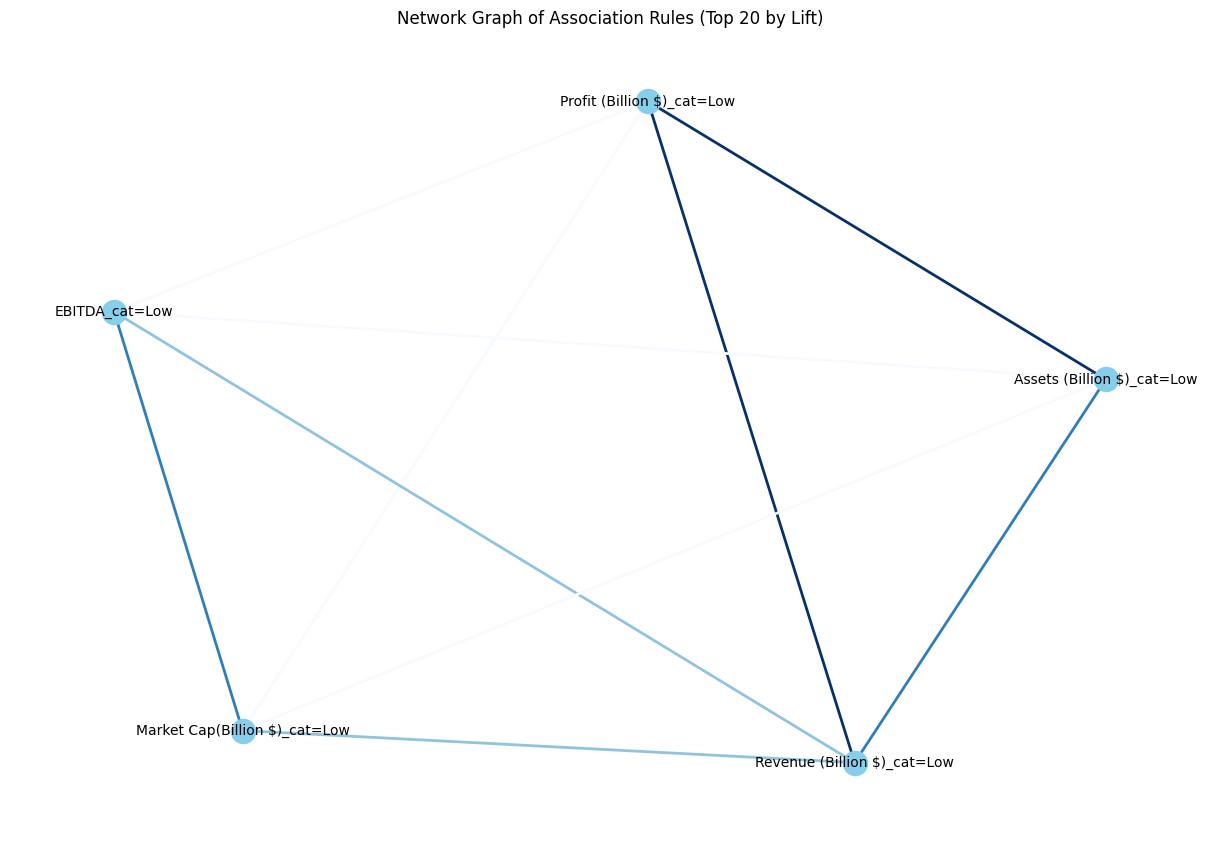

In [34]:
# Visualize the rules using a network graph.
top_rules = rules.sort_values(by='lift', ascending=False).head(20)
G = nx.Graph()
for _, rule in top_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    for a in antecedents:
        for c in consequents:
            G.add_edge(a, c, weight=rule['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=weights,
        edge_cmap=plt.cm.Blues, width=2, font_size=10)
plt.title("Network Graph of Association Rules (Top 20 by Lift)")
plt.show()